### 1) Importing Libraries and dataframe

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing movies_modified_3.csv dataframe

path = r'/Users/matthewabrams/Desktop/Movie Analysis'

movies = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'movies_modified_3.csv'), index_col = False)

movies.drop(columns = 'Unnamed: 0', inplace = True)

movies

,name,rating,unknown rating,genre,year,IMDb score,average IMDb score for country per film,votes,average number of votes for country per film,director,...,gross,average gross for country per film,profit,average profit for country per film,gross category,company,unknown company,duration (in min),released date,unknown released date
0,The Shining,R,False,Drama,1980,8.4,6.4,927000.0,95064.85761,Stanley Kubrick,...,46998772.0,86317303.02,27998772.0,52914083.47,20-100 M,Warner Bros.,False,146.0,1980-06-13,False
1,The Blue Lagoon,R,False,Adventure,1980,5.8,6.4,65000.0,95064.85761,Randal Kleiser,...,58853106.0,86317303.02,54353106.0,52914083.47,20-100 M,Columbia Pictures,False,104.0,1980-07-02,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,False,Action,1980,8.7,6.4,1200000.0,95064.85761,Irvin Kershner,...,538375067.0,86317303.02,520375067.0,52914083.47,> 100 M,Lucasfilm,False,124.0,1980-06-20,False
3,Airplane!,PG,False,Comedy,1980,7.7,6.4,221000.0,95064.85761,Jim Abrahams,...,83453539.0,86317303.02,79953539.0,52914083.47,20-100 M,Paramount Pictures,False,88.0,1980-07-02,False
4,Caddyshack,R,False,Comedy,1980,7.3,6.4,108000.0,95064.85761,Harold Ramis,...,39846344.0,86317303.02,33846344.0,52914083.47,20-100 M,Orion Pictures,False,98.0,1980-07-25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,True,Drama,2020,3.1,6.4,18.0,95064.85761,Joseph Ebanks,...,20205757.0,86317303.02,20198757.0,52914083.47,20-100 M,NaN,True,90.0,2020-10-23,False
7664,Dream Round,NaN,True,Comedy,2020,4.7,6.4,36.0,95064.85761,Dusty Dukatz,...,20205757.0,86317303.02,-294243.0,52914083.47,20-100 M,Cactus Blue Entertainment,False,90.0,2020-02-07,False
7665,Saving Mbango,NaN,True,Drama,2020,5.7,5.7,29.0,29.00000,Nkanya Nkwai,...,20205757.0,20205757.00,20147007.0,20147007.00,20-100 M,Embi Productions,False,104.0,2020-04-27,False
7666,It's Just Us,NaN,True,Drama,2020,6.4,6.4,33000.0,95064.85761,James Randall,...,20205757.0,86317303.02,20190757.0,52914083.47,20-100 M,NaN,True,120.0,2020-10-01,False


In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 2) Extreme Values Check

#### 2a) Checking for extreme values of gross column

In [4]:
movies['gross'].mean()

77063697.74973917

In [5]:
movies['gross'].std()

163919142.96640012

In [6]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_1 = movies['gross'].mean() + 2*(movies['gross'].std())
upper_limit_1

404901983.6825394

In [7]:
# Determining lower limit for outliers that are 2 standard deviations of the mean

lower_limit_1 = movies['gross'].mean() - 2*(movies['gross'].std())
lower_limit_1

-250774588.18306106

In [8]:
movies['gross'].max()

2847246203.0

In [9]:
# Determing the percentage of values under budget column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(movies[movies['gross'] <= upper_limit_1]) / (len(movies))

0.961528429838289

In [10]:
# About 4% of values under gross column are outliers

#### 2b) Checking for extreme values of budget column

In [11]:
movies['budget'].mean()

31317559.915362544

In [12]:
movies['budget'].std()

35752727.9353089

In [13]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_2 = movies['budget'].mean() + 2*(movies['budget'].std())
upper_limit_2

102823015.78598034

In [14]:
# Determining lower limit for outliers that are 2 standard deviations of the mean

lower_limit_2 = movies['budget'].mean() - 2*(movies['budget'].std())
lower_limit_2

-40187895.95525526

In [15]:
movies['budget'].max()

356000000.0

In [16]:
# Determing the percentage of values under budget column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observations

len(movies[movies['budget'] <= upper_limit_2]) / (len(movies))

0.9507042253521126

In [17]:
# About 5% of values under budget column are outliers

####  2c) Checking for extreme values of votes column

In [18]:
movies['votes'].mean()

88086.94431403234

In [19]:
movies['votes'].std()

163295.4446952631

In [20]:
# Determining upper limit for outliers that are 2 standard deviations of the mean

upper_limit_3 = movies['votes'].mean() + 2*(movies['votes'].std())
upper_limit_3

414677.83370455855

In [21]:
# Determining lower limit for outliers that are 2 standard deviations of the mean

lower_limit_3 = movies['votes'].mean() - 2*(movies['votes'].std())
lower_limit_3

-238503.9450764939

In [22]:
movies['votes'].max()

2400000.0

In [23]:
# Determing the percentage of values under votes column that are not outliers
# Dividing the number of values between 0 and upper limit and the total number of observation

len(movies[movies['votes'] <= upper_limit_3]) / (len(movies))

0.9587897756911842

In [24]:
# About 4% of values under votes column are outliers

### 3) Developing a linear regression for Budget and Gross columns

In [25]:
# Original Hypothesis: If film companies use a higher budget to make a movie, then they are more likely to earn higher gross figures

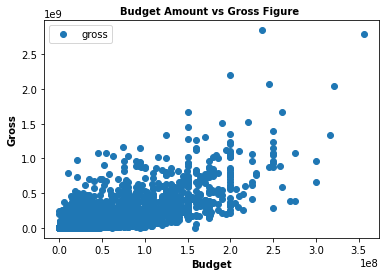

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

movies.plot(x = 'budget', y ='gross', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Budget Amount vs Gross Figure ', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Budget', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Gross', fontsize = 10, fontweight = 'bold')  
plt.show()

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = movies['budget'].values.reshape(-1,1)
y = movies['gross'].values.reshape(-1,1)

#### 3a) Compare how the regression fits the testing set

In [28]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

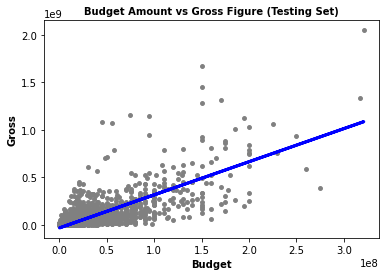

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color= 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color= 'blue', linewidth = 3)
plot_test.title('Budget Amount vs Gross Figure (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Budget', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted).round() # This is the mean squared error
r2 = r2_score(y_test, y_predicted).round(2) # This is the R2 score. 

In [33]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.5]]
Mean squared error:  1.1140881412729668e+16
R2 score:  0.53


In [34]:
# Since this linear regression model is about 53% effective for my testing set, it's not the best fit for my data. 
# This could be due to data bias or not enough data points to produce significant results. 
# I'll need a model with more dimensionality to be able to predict what budget is needed to produce more money

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,487287646.0,3.511728e+08
1,996171.0,3.936666e+07
2,20883046.0,1.073021e+08
3,1434174.0,3.936666e+07
4,214945591.0,2.466568e+08
5,13687027.0,3.936666e+07
6,94019120.0,4.110859e+07
7,2742912.0,3.065699e+07
8,2970.0,-1.463330e+07
9,2105078.0,2.786043e+06


In [36]:
# The predicted values are extremely far from the actual values

#### 3b) Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train).round()
r2 = r2_score(y_train, y_predicted_train).round(2)

In [39]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.5]]
Mean squared error:  1.2260671569654396e+16
R2 score:  0.57


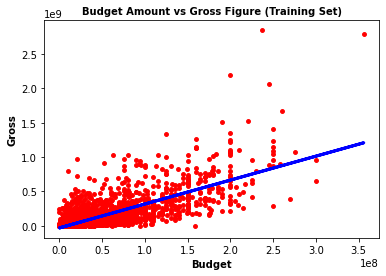

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='red', s = 15)
plot_test.plot(X_train, y_predicted_train, color='blue', linewidth =3)
plot_test.title('Budget Amount vs Gross Figure (Training Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Budget', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [41]:
# This linear regression model is about 57% effective for my training set, not too much a difference from my testing set

### 4) Developing a linear regression for Votes and Gross columns

In [42]:
# Original Hypothesis: If movies recieved a higher IMDb user vote count, then they are more likely to earn higher gross figures

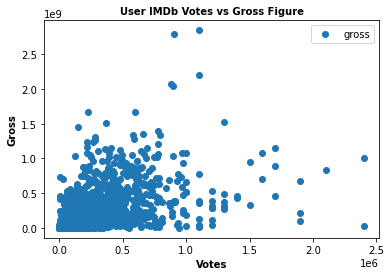

In [43]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

movies.plot(x = 'votes', y ='gross', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('User IMDb Votes vs Gross Figure', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Votes', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Gross', fontsize = 10, fontweight = 'bold')  
plt.show()

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = movies['votes'].values.reshape(-1,1)
y_2 = movies['gross'].values.reshape(-1,1)

#### 4a) Compare how the regression fits the testing set

In [45]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state=0)

In [46]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

# Fit the regression object onto the training set.

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [47]:
# Predict the values of y using X.

y_predicted_2 = regression.predict(X_test_2)

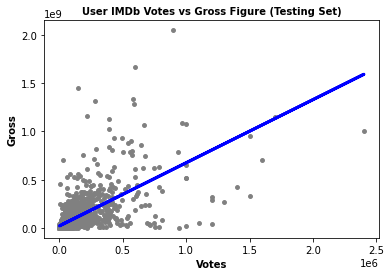

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color= 'gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color= 'blue', linewidth = 3)
plot_test.title('User IMDb Votes vs Gross Figure (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Votes', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [49]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_2, y_predicted_2).round() # This is the mean squared error
r2 = r2_score(y_test_2, y_predicted_2).round(2) # This is the R2 score. 

In [50]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[654.5]]
Mean squared error:  1.4202338242634792e+16
R2 score:  0.4


In [51]:
# Since this linear regression model is about 40% effective for my testing set, it's not the best fit for my data. 
# This could be due to data bias or not enough data points to produce significant results. 
# I'll need a model with more dimensionality to be able to predict how many votes will produce on IMDb

In [52]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,487287646.0,3.225923e+08
1,996171.0,2.387801e+07
2,20883046.0,2.741232e+07
3,1434174.0,2.144065e+07
4,214945591.0,1.694390e+08
5,13687027.0,2.243811e+07
6,94019120.0,6.930039e+07
7,2742912.0,2.557972e+07
8,2970.0,2.211086e+07
9,2105078.0,2.256901e+07


In [53]:
# The predicted values are extremely far from the actual values

#### 4b) Compare how the regression fits the testing set

In [54]:
y_predicted_train_2 = regression.predict(X_train_2) # This is predicting X_2_train!

In [55]:
rmse = mean_squared_error(y_train_2, y_predicted_train_2).round()
r2 = r2_score(y_train_2, y_predicted_train_2).round(2)

In [56]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[654.5]]
Mean squared error:  1.6976093616335012e+16
R2 score:  0.4


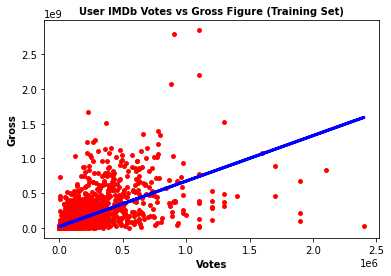

In [57]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='red', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='blue', linewidth =3)
plot_test.title('User IMDb Votes vs Gross Figure (Training Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Votes', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [58]:
# This linear regression model is about 40% effective for my training set, the same score received for the testing set

### 5) Running the regressions again but without outliers

#### 5a)  Budget vs Gross

In [59]:
# Subset of dataframe where values of gross column is within 2 standard deviations of the mean

movies_no_outliers = movies[movies['gross'] <= upper_limit_1]  

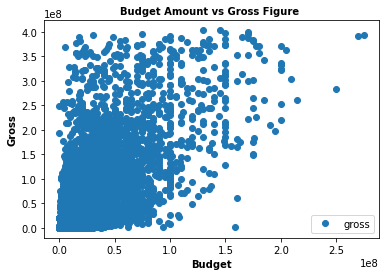

In [60]:
movies_no_outliers.plot(x = 'budget', y ='gross', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Budget Amount vs Gross Figure ', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Budget', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Gross', fontsize = 10, fontweight = 'bold')  
plt.show()

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = movies_no_outliers['budget'].values.reshape(-1,1)
y_3 = movies_no_outliers['gross'].values.reshape(-1,1)

In [62]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [63]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [64]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [65]:
rmse = mean_squared_error(y_test_3, y_predicted_3).round()
r2 = r2_score(y_test_3, y_predicted_3).round(2)

In [66]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.8]]
Mean squared error:  3635181539902676.0
R2 score:  0.43


In [67]:
# By getting rid of outliers, this lowered the R2 score for the testing set, didn't make the model better

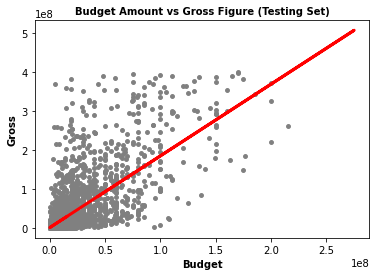

In [68]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_train_3, regression.predict(X_train_3), color='red', linewidth = 3)
plot_test.title('Budget Amount vs Gross Figure (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Budget', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data.head(30)

,Actual,Predicted
0,13818181.0,2.293418e+07
1,39976235.0,9.280179e+07
2,4412203.0,3.856246e+07
3,4376819.0,1.925694e+07
4,113100873.0,6.889972e+07
5,147332697.0,5.970661e+07
6,55003135.0,1.111880e+08
7,158964610.0,1.571535e+08
8,44926706.0,3.396591e+07
9,5725482.0,3.856246e+07


In [70]:
# The predicted values are relatively extremely far from the actual values

#### 5b)  Votes vs Gross

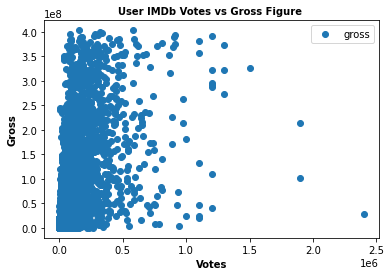

In [71]:
movies_no_outliers.plot(x = 'votes', y ='gross', style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('User IMDb Votes vs Gross Figure ', fontsize = 10, fontweight = 'bold')  
plt.xlabel('Votes', fontsize = 10, fontweight = 'bold')  
plt.ylabel('Gross', fontsize = 10, fontweight = 'bold')  
plt.show()

In [72]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_4 = movies_no_outliers['votes'].values.reshape(-1,1)
y_4 = movies_no_outliers['gross'].values.reshape(-1,1)

In [73]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

In [74]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_4, y_train_4)

LinearRegression()

In [75]:
# Predict.

y_predicted_4 = regression.predict(X_test_4)

In [76]:
rmse = mean_squared_error(y_test_4, y_predicted_4).round()
r2 = r2_score(y_test_4, y_predicted_4).round(2)

In [77]:
print('Slope:' ,regression.coef_.round(1))
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[334.6]]
Mean squared error:  4390600781186680.0
R2 score:  0.31


In [78]:
# By getting rid of outliers, this lowered the R2 score for the testing set, didn't make the model better

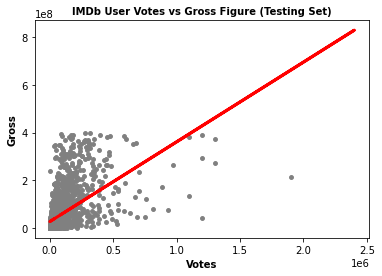

In [79]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_train_4, regression.predict(X_train_4), color='red', linewidth = 3)
plot_test.title('IMDb User Votes vs Gross Figure (Testing Set)', fontsize = 10, fontweight = 'bold')
plot_test.xlabel('Votes', fontsize = 10, fontweight = 'bold')
plot_test.ylabel('Gross', fontsize = 10, fontweight = 'bold')
plot_test.show()

In [80]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data.head(30)

,Actual,Predicted
0,13818181.0,3.862137e+07
1,39976235.0,3.962519e+07
2,4412203.0,3.192920e+07
3,4376819.0,2.838236e+07
4,113100873.0,7.174758e+07
5,147332697.0,1.922065e+08
6,55003135.0,5.434796e+07
7,158964610.0,1.108967e+08
8,44926706.0,3.293303e+07
9,5725482.0,3.360225e+07


In [81]:
# The predicted values are relatively extremely far from the actual values

### Summary

In [82]:
# By removing outliers, in this case would make my linear regression model scores relatively low  
# I've decided not to remove outliers from my models 
# It avoids the risk of potential bias if I do end removing the outliers
# Since using a Linear Regression model for my variables is not strong, I'd have to use another model that's non-linear
# I can also consider using other types of models besides linear regression for measuring relationships between gross figure and votes. Same for budget 